In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, median_absolute_error,r2_score

 Leer el conjunto de datos desde el archivo Excel

In [40]:
df = pd.read_excel('dataset.xlsx')
# Obtener el número de filas
num_filas = df.shape[0]
print(f'Número de instancias: {num_filas}')
# Obtener el número de columnas
num_columnas = df.shape[1]
print(f'Número de propiedades: {num_columnas}')

# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)
# Obtener estadísticas resumidas de las propiedades numéricas
resumen_estadisticas = df.describe()
print('Estadísticas resumidas:\n', resumen_estadisticas)


Número de instancias: 8279
Número de propiedades: 23
Nombres de propiedades: Index(['date', 'E1', 'E2', 'E3', 'E4', 'E5', 'qq', 'temp',
       'Evapotranspiration', 'Evapotranspiration_Crop', 'Nvdi',
       'Relat_Hum_Max_Temp', 'Temp_Air_Max', 'Temp_Air_Min', 'Dew_Temp_Max',
       'Precipitacion', 'Precipitacion_Hours', 'Sea_Level_Pressure',
       'Vapor_Pressure_Deficit', 'Dew_Temp_Mean', 'Crop_Water_Demand',
       'Sunshine_Duration', 'anio'],
      dtype='object')
Estadísticas resumidas:
               date           E1           E2           E3           E4  \
count  8279.000000  8279.000000  8279.000000  8279.000000  8279.000000   
mean      6.499336     3.733905     3.266699     2.497886     2.315135   
std       3.451940     4.713472     4.020621     3.284300     3.216682   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.500000     1.000000     0.000000     0.000000     0.000000   
50%       6.000000     2.000000     2.000000     1.0000

 Visualizar relaciones entre las variables mediante un pairplot

Convirtiendo en variables categoricas el mes y año

In [41]:
df = pd.get_dummies(df, columns=['date'], prefix='date')
# Suponiendo que 'anio' es la columna con los números de año
df = pd.get_dummies(df, columns=['anio'], prefix='anio')
#df.to_excel("DatasetCat",index=False)
# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)

Nombres de propiedades: Index(['E1', 'E2', 'E3', 'E4', 'E5', 'qq', 'temp', 'Evapotranspiration',
       'Evapotranspiration_Crop', 'Nvdi', 'Relat_Hum_Max_Temp', 'Temp_Air_Max',
       'Temp_Air_Min', 'Dew_Temp_Max', 'Precipitacion', 'Precipitacion_Hours',
       'Sea_Level_Pressure', 'Vapor_Pressure_Deficit', 'Dew_Temp_Mean',
       'Crop_Water_Demand', 'Sunshine_Duration', 'date_1', 'date_2', 'date_3',
       'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10',
       'date_11', 'date_12', 'anio_2022'],
      dtype='object')


In [21]:
sns.pairplot(df, diag_kind='kde')
plt.show()

matriz de correlación para cuantificar la relación lineal entre las variables:

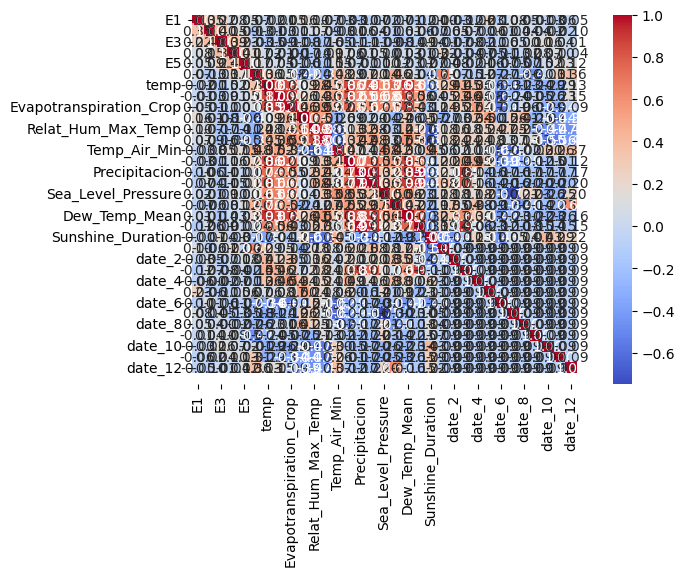

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Aplicando  SVM y egresion lineal simple en un enfoque de regresion lineal

In [45]:
X = df.drop(['qq'], axis=1)
y = df['qq']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Crear un DataFrame para almacenar las métricas

# SVM Regresión
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
mae = mean_absolute_error(y_test, svm_predictions)
rmse = mean_squared_error(y_test, svm_predictions, squared=False)
explained_variance = explained_variance_score(y_test, svm_predictions)
medae = median_absolute_error(y_test, svm_predictions)

# Regresión Lineal Simple
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
rmse = mean_squared_error(y_test, linear_predictions, squared=False)
explained_variance = explained_variance_score(y_test, linear_predictions)
medae = median_absolute_error(y_test, linear_predictions)


Graficos de la prediccion

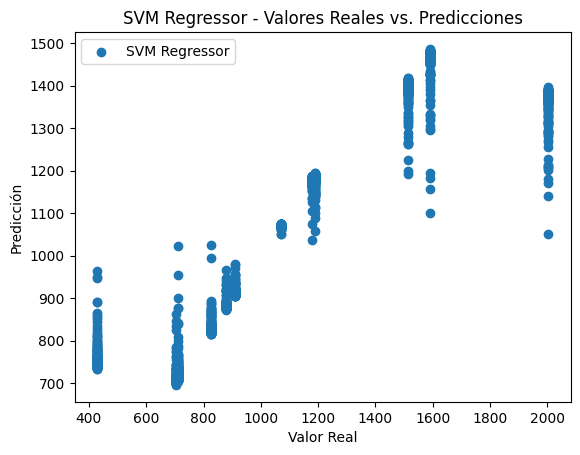

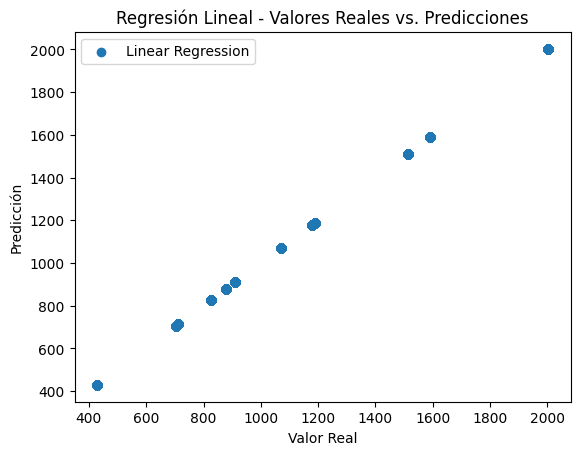

In [46]:
# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('SVM Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión Lineal - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Regresion no lineal
Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)


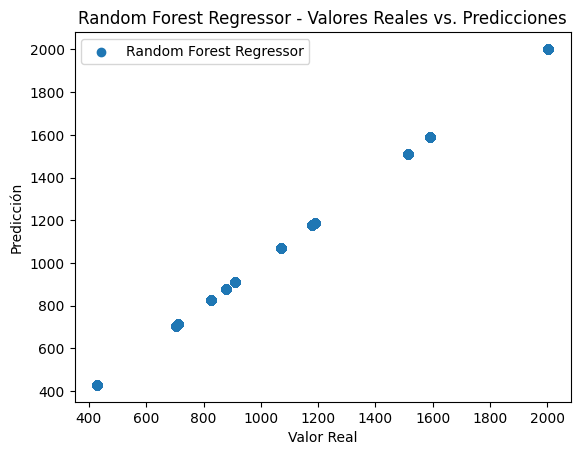

In [48]:
# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Random Forest Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Gradient Boosting

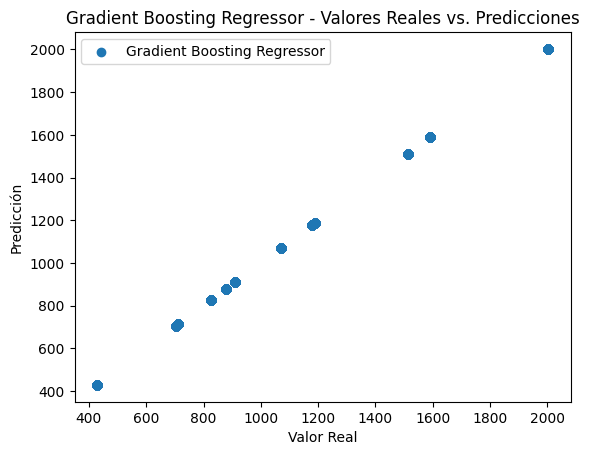

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Crear un modelo de Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
gb_predictions = gb_regressor.predict(X_test)

# Gráfico para Gradient Boosting Regressor
plt.scatter(y_test, gb_predictions, label='Gradient Boosting Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gradient Boosting Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


RNN

Epoch 1/50
166/166 [==============================] - 2s 6ms/step - loss: 373485.2500 - val_loss: 197806.6562
Epoch 2/50
166/166 [==============================] - 1s 4ms/step - loss: 188781.6875 - val_loss: 190682.6250
Epoch 3/50
166/166 [==============================] - 1s 4ms/step - loss: 173003.6562 - val_loss: 165250.3594
Epoch 4/50
166/166 [==============================] - 1s 4ms/step - loss: 166549.5938 - val_loss: 174980.4531
Epoch 5/50
166/166 [==============================] - 1s 4ms/step - loss: 160743.4531 - val_loss: 144561.6875
Epoch 6/50
166/166 [==============================] - 1s 4ms/step - loss: 146981.3281 - val_loss: 128472.7031
Epoch 7/50
166/166 [==============================] - 1s 4ms/step - loss: 124626.0938 - val_loss: 144674.9688
Epoch 8/50
166/166 [==============================] - 1s 4ms/step - loss: 72223.3203 - val_loss: 47485.3125
Epoch 9/50
166/166 [==============================] - 1s 4ms/step - loss: 39834.9062 - val_loss: 31040.1621
Epoch 10/50
16

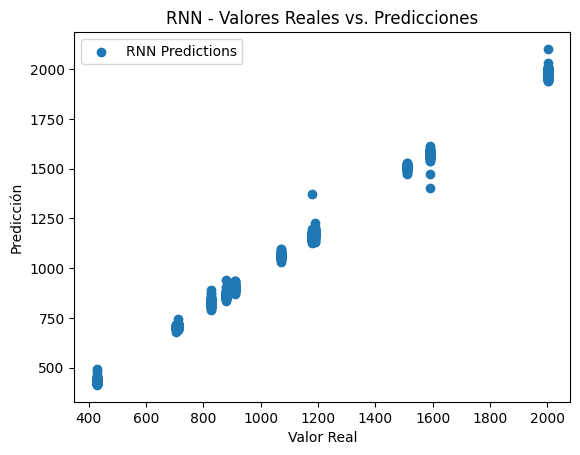

In [50]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una RNN

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Construir el modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape de los datos para que sean compatibles con la entrada de la RNN
X_train_rnn_reshaped = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn_reshaped = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))

# Entrenar el modelo
history = model.fit(X_train_rnn_reshaped, y_train_rnn, epochs=50, batch_size=32, validation_data=(X_val_rnn_reshaped, y_val_rnn))

# Realizar predicciones en el conjunto de prueba
X_test_rnn_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rnn_predictions = model.predict(X_test_rnn_reshaped)

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RNN - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Epoch 1/50
166/166 [==============================] - 3s 12ms/step - loss: 26596798.0000 - val_loss: 1354737.0000
Epoch 2/50
166/166 [==============================] - 2s 10ms/step - loss: 1816152.3750 - val_loss: 1358875.6250
Epoch 3/50
166/166 [==============================] - 2s 10ms/step - loss: 1342561.2500 - val_loss: 1358496.0000
Epoch 4/50
166/166 [==============================] - 2s 10ms/step - loss: 1342171.6250 - val_loss: 1358100.3750
Epoch 5/50
166/166 [==============================] - 2s 10ms/step - loss: 1341774.0000 - val_loss: 1357698.2500
Epoch 6/50
166/166 [==============================] - 2s 10ms/step - loss: 1341371.6250 - val_loss: 1357292.8750
Epoch 7/50
166/166 [==============================] - 2s 9ms/step - loss: 1340964.3750 - val_loss: 1356883.8750
Epoch 8/50
166/166 [==============================] - 2s 9ms/step - loss: 1340553.8750 - val_loss: 1356472.3750
Epoch 9/50
166/166 [==============================] - 1s 9ms/step - loss: 1340141.8750 - val_loss

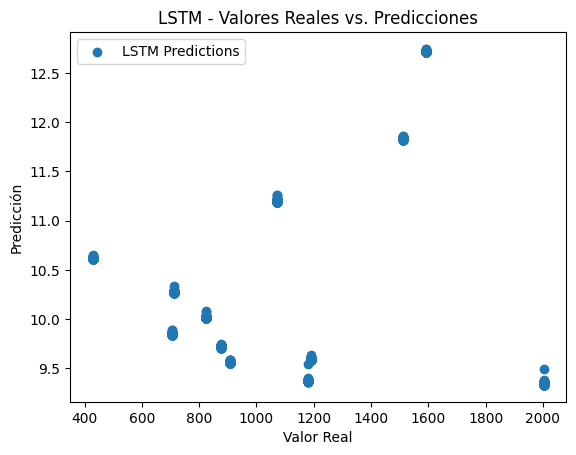

In [51]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una LSTM

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Reshape de los datos para que sean compatibles con la entrada de la LSTM
X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_val_lstm_reshaped = X_val_lstm.reshape((X_val_lstm.shape[0], X_val_lstm.shape[1], 1))

# Construir el modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_lstm_reshaped, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_val_lstm_reshaped, y_val_lstm))

# Realizar predicciones en el conjunto de prueba
X_test_lstm_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = model.predict(X_test_lstm_reshaped)

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('LSTM - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


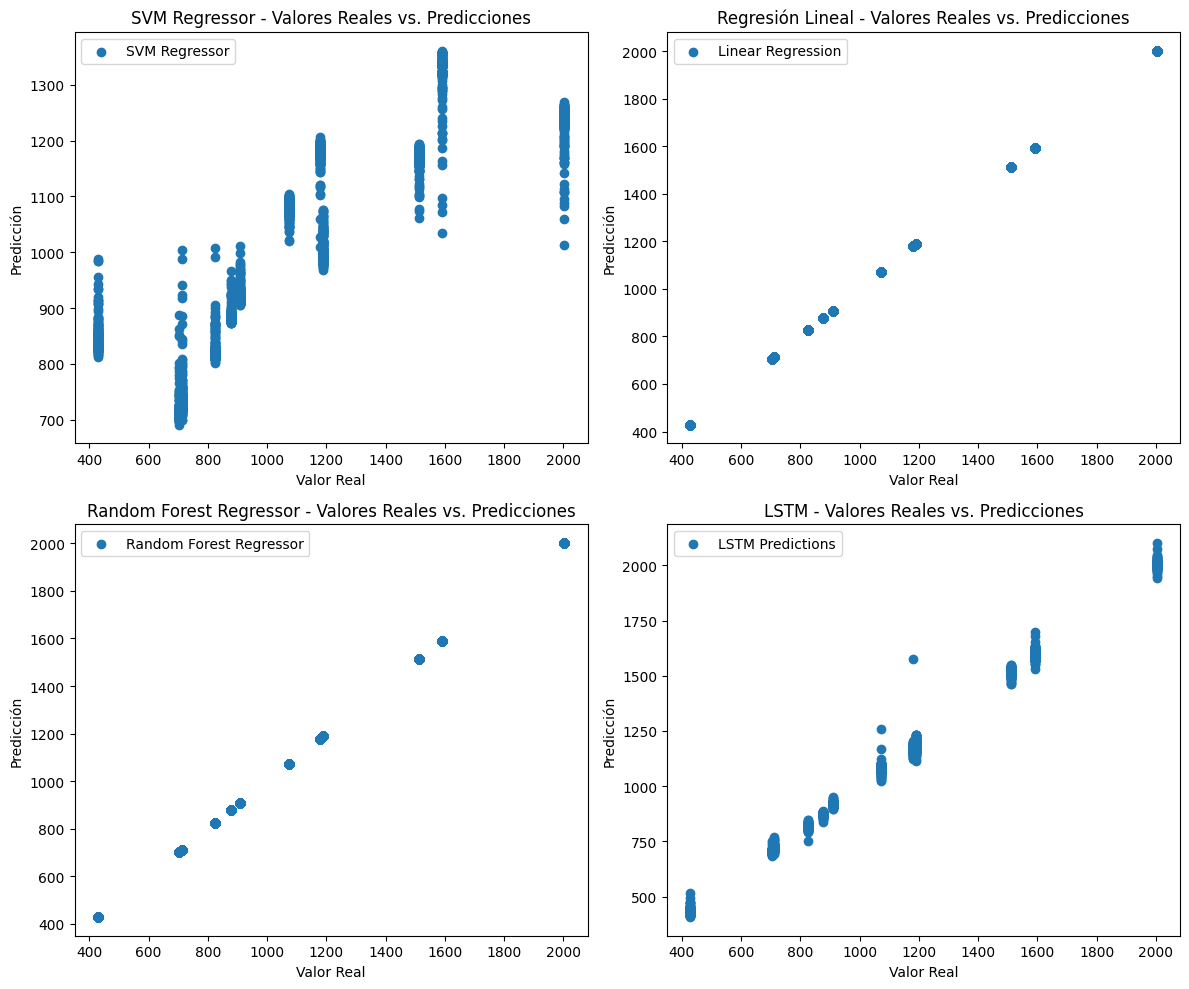

In [17]:
# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico para SVM Regressor
axes[0, 0].scatter(y_test, svm_predictions, label='SVM Regressor')
axes[0, 0].set_xlabel('Valor Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].set_title('SVM Regressor - Valores Reales vs. Predicciones')
axes[0, 0].legend()

# Gráfico para Regresión Lineal
axes[0, 1].scatter(y_test, linear_predictions, label='Linear Regression')
axes[0, 1].set_xlabel('Valor Real')
axes[0, 1].set_ylabel('Predicción')
axes[0, 1].set_title('Regresión Lineal - Valores Reales vs. Predicciones')
axes[0, 1].legend()

# Gráfico para Random Forest Regressor
axes[1, 0].scatter(y_test, rf_predictions, label='Random Forest Regressor')
axes[1, 0].set_xlabel('Valor Real')
axes[1, 0].set_ylabel('Predicción')
axes[1, 0].set_title('Random Forest Regressor - Valores Reales vs. Predicciones')
axes[1, 0].legend()

# Gráfico para LSTM
axes[1, 1].scatter(y_test, lstm_predictions, label='LSTM Predictions')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Predicción')
axes[1, 1].set_title('LSTM - Valores Reales vs. Predicciones')
axes[1, 1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

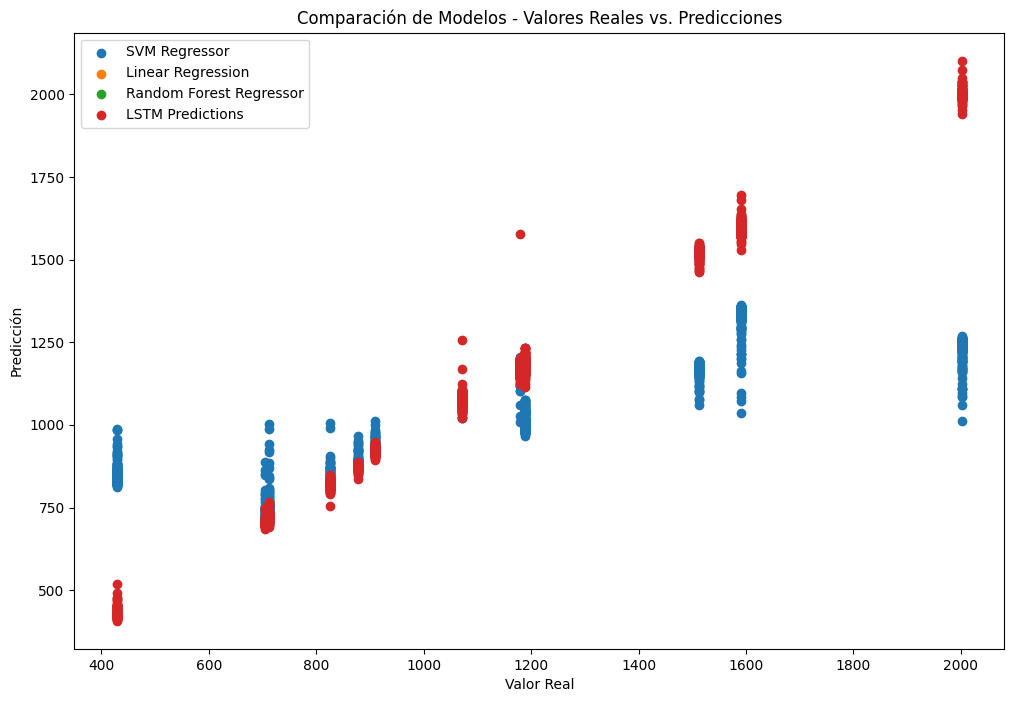

In [18]:
import matplotlib.pyplot as plt

# Crear un solo gráfico
plt.figure(figsize=(12, 8))

# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')

# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')

# Ajustar etiquetas y leyenda
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos - Valores Reales vs. Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()
